In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv


In [67]:
train_df = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")
test_df =  pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
sm = pd.read_csv("/kaggle/input/cat-in-the-dat/sample_submission.csv", index_col='id')

In [68]:
sm.head(10)

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5
300005,0.5
300006,0.5
300007,0.5
300008,0.5


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [70]:
cat_feat = train_df.select_dtypes(include='object').columns
num_features = [feat for feat in train_df.columns.to_list() if feat not in cat_feat]
cat_feat

Index(['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5',
       'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_1', 'ord_2', 'ord_3', 'ord_4',
       'ord_5'],
      dtype='object')

Multivariate Analysis

In [71]:
# import seaborn as sns
# for feat in cat_feat:
#     sns.catplot(data = train_df, x = feat, hue = "target", height = 3, kind = "count")

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelEncoder

In [73]:
ordinal_values = ["ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]
for vals in ordinal_values:
    train_df[vals] = train_df[vals].astype("category")
    test_df[vals] = test_df[vals].astype("category")
train_df["ord_1"].cat.categories = ["Novice", "Contributor", "Expert", "Master", "Grandmaster"]
train_df["ord_2"].cat.categories = ["Warm", "Hot", "Boiling Hot", "Lava Hot", 'Cold', 'Freezing']
test_df["ord_1"].cat.categories = ["Novice", "Contributor", "Expert", "Master", "Grandmaster"]
test_df["ord_2"].cat.categories = ["Warm", "Hot", "Boiling Hot", "Lava Hot", 'Cold', 'Freezing']

In [74]:
binary_values = ["bin_3", "bin_4"]
for vals in binary_values:
    train_df[vals] = train_df[vals].astype("category")
    test_df[vals] = test_df[vals].astype("category")

In [75]:
nominal_values = ["nom_0", "nom_1", "nom_2", "nom_3", "nom_4", "nom_5", "nom_6", "nom_7", "nom_8", "nom_9"]
for vals in nominal_values:
    train_df[vals] = train_df[vals].astype("category")
    test_df[vals] = test_df[vals].astype("category")

In [76]:
train, test = train_test_split(train_df, test_size = 0.2, random_state=0)

In [77]:
def numerisize(df, features):
    """ Function to convert categories into integers"""
    for feats in features:
        print(df[feats].cat.categories)
        df[feats] = df[feats].cat.codes
    return df

In [78]:
train = numerisize(train, ordinal_values)
test = numerisize(test, ordinal_values)
test_df = numerisize(test_df, ordinal_values)

Index(['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'], dtype='object')
Index(['Warm', 'Hot', 'Boiling Hot', 'Lava Hot', 'Cold', 'Freezing'], dtype='object')
Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o'],
      dtype='object')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')
Index(['AP', 'Ai', 'Aj', 'BA', 'BE', 'Bb', 'Bd', 'Bn', 'CL', 'CM',
       ...
       'vq', 'vy', 'wu', 'wy', 'xP', 'xy', 'yN', 'yY', 'yc', 'zU'],
      dtype='object', length=192)
Index(['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'], dtype='object')
Index(['Warm', 'Hot', 'Boiling Hot', 'Lava Hot', 'Cold', 'Freezing'], dtype='object')
Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o'],
      dtype='object')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 

In [79]:
train = numerisize(train, binary_values)
test = numerisize(test, binary_values)
test_df = numerisize(test_df, binary_values)

Index(['F', 'T'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['N', 'Y'], dtype='object')


In [80]:
train = numerisize(train, nominal_values)
test = numerisize(test, nominal_values)
test_df = numerisize(test_df, nominal_values)

Index(['Blue', 'Green', 'Red'], dtype='object')
Index(['Circle', 'Polygon', 'Square', 'Star', 'Trapezoid', 'Triangle'], dtype='object')
Index(['Axolotl', 'Cat', 'Dog', 'Hamster', 'Lion', 'Snake'], dtype='object')
Index(['Canada', 'China', 'Costa Rica', 'Finland', 'India', 'Russia'], dtype='object')
Index(['Bassoon', 'Oboe', 'Piano', 'Theremin'], dtype='object')
Index(['005dd4ce3', '037bd73d8', '05950689f', '05d5943a3', '06eeaf0aa',
       '075ceb58b', '077fd9465', '0870880f6', '0870b0a5d', '09a4ad97d',
       ...
       'f50eb07ae', 'f6c524860', 'f710fca39', 'f7821e391', 'f802a9849',
       'f8faea16f', 'f9d17bb93', 'f9e5266f9', 'fa0a88fe9', 'fd04a970f'],
      dtype='object', length=222)
Index(['0000ee65f', '00e9c15b8', '01455237a', '017eb57f0', '0249d8675',
       '02d689659', '0302f1ffc', '031d49dfc', '0516fa0d8', '062cd9a70',
       ...
       'fc613f31d', 'fc791ebea', 'fc88900c4', 'fc88d723d', 'fd2344f16',
       'fd9370b9e', 'fe0b55cd2', 'fe0cddc2c', 'fe77c71bd', 'ffc60be1c'],
  

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
test_df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [83]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [84]:
train_without_labels  = train.drop(["id", "target"], axis = 1)
test_without_labels  = test.drop(["id", "target"], axis = 1)
test_df = test_df.drop(["id"], axis = 1)
train_y = train["target"]
test_y = test["target"]

In [85]:
train_without_labels.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [86]:
test_df.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [87]:
train_without_labels = scaler.fit_transform(train_without_labels)
test_without_labels = scaler.transform(test_without_labels)
test_df = scaler.transform(test_df)

In [88]:
"""
from sklearn.model_selection import GridSearchCV
# %% time
parameters = {
    "n_estimators": [100, 150, 200], 
    "max_depth": [15, 25, 25],
    "min_samples_leaf": [5, 7] 
}

model_random_forest = RandomForestClassifier(
    random_state = 1,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='precision',
    n_jobs = -1
)
model_random_forest.fit(sample_train_without_labels, sample_train_y)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
"""



'\nfrom sklearn.model_selection import GridSearchCV\n# %% time\nparameters = {\n    "n_estimators": [100, 150, 200], \n    "max_depth": [15, 25, 25],\n    "min_samples_leaf": [5, 7] \n}\n\nmodel_random_forest = RandomForestClassifier(\n    random_state = 1,\n    class_weight=\'balanced\',\n)\n\nmodel_random_forest = GridSearchCV(\n    model_random_forest, \n    parameters, \n    cv=5,\n    scoring=\'precision\',\n    n_jobs = -1\n)\nmodel_random_forest.fit(sample_train_without_labels, sample_train_y)\n\nprint(\'-----\')\nprint(f\'Best parameters {model_random_forest.best_params_}\')\nprint(\n    f\'Mean cross-validated accuracy score of the best_estimator: \'+     f\'{model_random_forest.best_score_:.3f}\'\n)\n'

In [101]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs = -1, random_state = 1, C = 0.125, max_iter = 800)
# model = RandomForestClassifier(max_depth = 20 , n_estimators = 150, min_samples_leaf=3, random_state = 1)
model.fit(train_without_labels, train_y)
y_train_pred = model.predict(train_without_labels)
y_test_pred = model.predict(test_without_labels)

In [102]:
y_preds = model.predict_proba(test_df)[:,1]

In [103]:
sm['target'] = y_preds
sm.to_csv('submission.csv', index = "id")

[[152907  13651]
 [ 53558  19884]]
[[38258  3420]
 [13387  4935]]


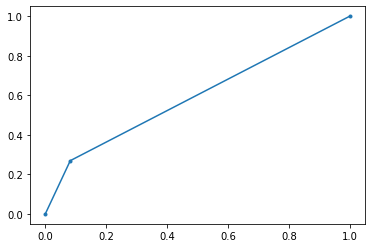

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix
fpr, tpr, _ = roc_curve(test_y, y_test_pred)
plt.plot(fpr, tpr, marker='.', label='RandomForest')
print(confusion_matrix(train_y, y_train_pred))
print(confusion_matrix(test_y, y_test_pred))